In [3]:
import pandas as pd
import ssl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

ssl._create_default_https_context = ssl._create_unverified_context

# Features

In [15]:
# df = pd.read_csv('/Users/ira/Downloads/REALEC_Inspector/data/feature_result.csv')
# df = df[df['type'] != 4]
# df['sum_punct'] = df[['punct_mistakes_pp', 'punct_mistakes_because',
#                       'punct_mistakes_but', 'punct_mistakes_compare',]].sum(axis=1)
# df = df.round(2)

In [77]:
df[df['punct_mistakes_compare'] != 0].shape

(173, 77)

In [76]:
df.shape

(3441, 77)

In [21]:
targets = []
for t in df['class']:
    if int(t) >= 70:
        targets.append('best')
    else:
        targets.append('not_best')
df['class'] = targets

In [22]:
set(df['type'].to_list())

{1, 2}

In [23]:
def plot_box_plot(feature, df):
    sns_plt = sns.boxplot(x="class", y=feature, data=df, palette="Set2")
    return sns_plt

In [24]:
df_1 = df[df['type'] == 1]
df_2 = df[df['type'] == 2]

In [25]:
feature_columns = list(df.columns)
feature_columns.remove('class')
feature_columns.remove('name')
feature_columns.remove('text')
feature_columns.remove('type')

In [26]:
for feature in feature_columns:
    sns_plt = plot_box_plot(feature, df_1)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/boxplots/type_1/'+ feature +'_boxplot.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [27]:
for feature in feature_columns:
    sns_plt = plot_box_plot(feature, df_2)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/boxplots/type_2/'+ feature +'_boxplot.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [28]:
for feature in feature_columns:
    sns_plt = plot_box_plot(feature, df)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/boxplots/together/'+ feature +'_boxplot.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

# Line of the feature

In [38]:
import numpy as np

In [66]:
def plot_line(list_values, feature):
    sorted_list_values = sorted(list_values)
    df = pd.DataFrame(data = {'number': range(len(sorted_list_values)),
                              feature: sorted_list_values})
    ax = sns.lineplot(x='number', y=feature, data=df, palette="Set2")
    return ax

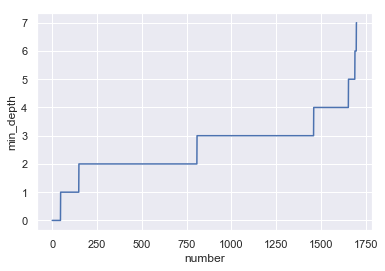

In [67]:
list_values = df_1['min_depth'].tolist()
sns_plt = plot_line(list_values, 'min_depth')

In [69]:
for feature in feature_columns:
    list_values = df_1[feature].tolist()
    sns_plt = plot_line(list_values, feature)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/lines/type_1/'+ feature +'_line.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [70]:
for feature in feature_columns:
    list_values = df_2[feature].tolist()
    sns_plt = plot_line(list_values, feature)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/lines/type_2/'+ feature +'_line.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [71]:
for feature in feature_columns:
    list_values = df[feature].tolist()
    sns_plt = plot_line(list_values, feature)
    sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/lines/together/'+ feature +'_line.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

# Links and n-grams

In [4]:
df = pd.read_csv('/Users/ira/Downloads/REALEC_Inspector/results/links_ngrams_result.csv')

In [5]:
df.head()

,name,text,class,type,link_Sentence connectors(Furthermore),link_Sentence connectors(In addition),link_Sentence connectors(Moreover),link_Sentence connectors,link_Phrases linkers(In addition),link_Phrases linkers,...,4grams_Attitudinal/modality(it is difficult to),4grams_Attitudinal/modality(it is very difficult),4grams_Attitudinal/modality(it is hard to),4grams_Attitudinal/modality(it is not easy),4grams_Attitudinal/modality(necessary for us to),4grams_Attitudinal/modality(should learn how to),4grams_Attitudinal/modality(will not be able to),4grams_Attitudinal/modality,4grams_Stance,4grams_all
0,./data/exam/exam2017/OBy_146_1,This two line graphs illustrates monthly avera...,60,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./data/exam/exam2017/EGe_15_1,"﻿We have two graphics, which show us the popul...",65,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./data/exam/exam2017/DOv_2_2,More and more young people are stunding on the...,60,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2
3,./data/exam/exam2017/EGe_61_2,﻿Nowdays we can notice the tendency that large...,65,2,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,3
4,./data/exam/exam2017/NMya_48_1,The graph gives information about level of une...,55,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
targets = []
for t in df['class']:
    if int(t) >= 70:
        targets.append('best')
    else:
        targets.append('not_best')
df['class'] = targets

In [5]:
df.columns.tolist()

['name',
 'text',
 'class',
 'type',
 'link_Sentence connectors(Furthermore)',
 'link_Sentence connectors(In addition)',
 'link_Sentence connectors(Moreover)',
 'link_Sentence connectors',
 'link_Phrases linkers(In addition)',
 'link_Phrases linkers',
 'link_Addition',
 'link_subordinators(Although)',
 'link_subordinators(Even though)',
 'link_subordinators',
 'link_Sentence connectors(However)',
 'link_Sentence connectors(Nevertheless)',
 'link_Phrase linkers(despite)',
 'link_Phrase linkers(In spite of)',
 'link_Phrase linkers',
 'link_Adversativity',
 'link_subordinators(Because)',
 'link_subordinators(since)',
 'link_Sentence connectors(Therefore)',
 'link_Sentence connectors(As a result)',
 'link_Sentence connectors(consequently)',
 'link_Sentence connectors(Hence)',
 'link_Sentence connectors(Thus)',
 'link_Phrase linkers(Because of)',
 'link_Phrase linkers(Due to)',
 'link_Phrase linkers(As a result of)',
 'link_Cause and effect',
 'link_Sentence connectors(In other words)',
 'l

In [8]:
sns.set(rc={'figure.figsize':(20,10)})

In [11]:
subdf = df[['class', 'link_Addition', 'link_Adversativity',
            'link_Cause and effect', 'link_Clarification',
            'link_Contrast', 'link_Illustration', 'link_Intensification']]
subdf['class'] = subdf['class'].map({'not_best': 0, 'best': 1})
mdf = pd.melt(subdf, id_vars=['class'], var_name=['number'])
sns_plt = sns.boxplot(x="class", y="value", hue="number", data=mdf, palette="Set2") 
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/links.png')
plt.clf()

/Users/ira/Downloads/REALEC_Inspector/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<Figure size 1440x720 with 0 Axes>

In [12]:
subdf = df[['class', '4grams_Discourse organizers', '4grams_Referential',
            '4grams_Stance']]
subdf['class'] = subdf['class'].map({'not_best': 0, 'best': 1})
mdf = pd.melt(subdf, id_vars=['class'], var_name=['number'])
sns_plt = sns.boxplot(x="class", y="value", hue="number", data=mdf, palette="Set2") 
sns_plt.figure.savefig('/Users/ira/Downloads/REALEC_Inspector/graphs/4grams.png')
plt.clf()

/Users/ira/Downloads/REALEC_Inspector/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1440x720 with 0 Axes>